<a href="https://colab.research.google.com/github/Bhimsendabby/Machine--Learning-practice/blob/main/pytorch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import glob
import time
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb

import torch
from torch import nn, optim
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_colab = None

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the CPU


In [4]:
#For numpy gradient
# X = np.array([1, 2, 3,4])
# Y = np.array([2, 4, 6,8])
# w =0.0

learning_rate = 0.01

# def forward(x):
#     return x * 2

# def loss(y_pred, y_true):
#     return ((y_pred - y_true)**2).mean()


#For numpy gradient
# def loss_grad(x, y_pred, y_true):
#     return np.dot(2 * x,(y_pred - y_true)).mean()

#with numpy
# for epoch in range(100):
#     y_pred = forward(X)
#     l = loss(y_pred, Y)
#     grad = loss_grad(X, y_pred, Y)

#     w = w - learning_rate * grad
#     if epoch % 10 == 0:
#         print(f'epoch {epoch + 1}, loss {l:.4f}, weight {w:.4f}')


# print(f'Result: after 100 epochs{forward(10)}')


#with torch

import torch

# Input and output tensors
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# Initialize weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Learning rate
learning_rate = 0.01

# Forward pass function
def forward(x):
    return x * w

# Loss function
def loss(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

# Training loop
for epoch in range(100):
    y_pred = forward(X)
    l = loss(y_pred, Y)
    l.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad

    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch + 1}, loss {l:.4f}, weight {w:.4f}')

# Test the result
print(f'Result: after 100 epochs, prediction for 10 is {forward(torch.tensor(10.0)):.4f}')

epoch 1, loss 30.0000, weight 0.3000
epoch 11, loss 1.1628, weight 1.6653
epoch 21, loss 0.0451, weight 1.9341
epoch 31, loss 0.0017, weight 1.9870
epoch 41, loss 0.0001, weight 1.9974
epoch 51, loss 0.0000, weight 1.9995
epoch 61, loss 0.0000, weight 1.9999
epoch 71, loss 0.0000, weight 2.0000
epoch 81, loss 0.0000, weight 2.0000
epoch 91, loss 0.0000, weight 2.0000
Result: after 100 epochs, prediction for 10 is 20.0000


In [8]:
loss = nn.MSELoss()

optimizer = optim.SGD([w], lr=learning_rate)

# Training loop
for epoch in range(100):
    y_pred = forward(X)
    l = loss(y_pred, Y)

    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch {epoch + 1}, loss {l:.4f}, weight {w:.4f}')

# Test the result
print(f'Result: after 100 epochs, prediction for 10 is {forward(torch.tensor(10.0)):.4f}')

epoch 1, loss 0.0000, weight 2.0000
epoch 11, loss 0.0000, weight 2.0000
epoch 21, loss 0.0000, weight 2.0000
epoch 31, loss 0.0000, weight 2.0000
epoch 41, loss 0.0000, weight 2.0000
epoch 51, loss 0.0000, weight 2.0000
epoch 61, loss 0.0000, weight 2.0000
epoch 71, loss 0.0000, weight 2.0000
epoch 81, loss 0.0000, weight 2.0000
epoch 91, loss 0.0000, weight 2.0000
Result: after 100 epochs, prediction for 10 is 20.0000


In [12]:
#Linear Regression

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

num_samples, num_features = X.shape

print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')

# Define the model
input_size = num_features
output_size = 1

model = nn.Linear(input_size, output_size)



print(f'Result: Before epochs, prediction for 10 is {model(X_test).item():.4f}')

Number of samples: 4
Number of features: 1
Result: Before epochs, prediction for 10 is -3.4915


In [15]:
loss = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(100):
    y_pred = model(X)
    l = loss(y_pred, Y)

    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        w, b = model.parameters()
        print(f'epoch {epoch + 1}, loss {l:.4f}, weight {w[0][0].item():.4f}')

# Test the result
print(f'Result: after 100 epochs, prediction for 10 is {model(X_test).item():.4f}')

epoch 1, loss 0.0001, weight 1.9900
epoch 11, loss 0.0001, weight 1.9903
epoch 21, loss 0.0001, weight 1.9906
epoch 31, loss 0.0001, weight 1.9909
epoch 41, loss 0.0001, weight 1.9912
epoch 51, loss 0.0001, weight 1.9914
epoch 61, loss 0.0001, weight 1.9917
epoch 71, loss 0.0001, weight 1.9919
epoch 81, loss 0.0001, weight 1.9922
epoch 91, loss 0.0001, weight 1.9924
Result: after 100 epochs, prediction for 10 is 9.9848


In [19]:
class LinearRegression(nn.Module):
    def __init__(self, input_size,output_size) -> None:
        super(LinearRegression,self).__init__()

        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression(input_size, output_size)



print(f'Result: Before epochs, prediction for 10 is {model(X_test).item():.4f}')

loss = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(100):
    y_pred = model(X)
    l = loss(y_pred, Y)

    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        w, b = model.parameters()
        print(f'epoch {epoch + 1}, loss {l:.4f}, weight {w[0][0].item():.4f}')

# Test the result
print(f'Result: after 100 epochs, prediction for 10 is {model(X_test).item():.4f}')

Result: Before epochs, prediction for 10 is -0.2651
epoch 1, loss 31.5608, weight 0.2522
epoch 11, loss 0.8788, weight 1.5438
epoch 21, loss 0.0813, weight 1.7567
epoch 31, loss 0.0573, weight 1.7960
epoch 41, loss 0.0534, weight 1.8072
epoch 51, loss 0.0503, weight 1.8137
epoch 61, loss 0.0474, weight 1.8193
epoch 71, loss 0.0446, weight 1.8247
epoch 81, loss 0.0420, weight 1.8299
epoch 91, loss 0.0396, weight 1.8349
Result: after 100 epochs, prediction for 10 is 9.6690


#Linear Regression

epoch 1, loss 2105.8369
epoch 101, loss 380.4950
epoch 201, loss 315.0395
epoch 301, loss 312.3373
epoch 401, loss 312.2222
epoch 501, loss 312.2172
epoch 601, loss 312.2170
epoch 701, loss 312.2170
epoch 801, loss 312.2170
epoch 901, loss 312.2170


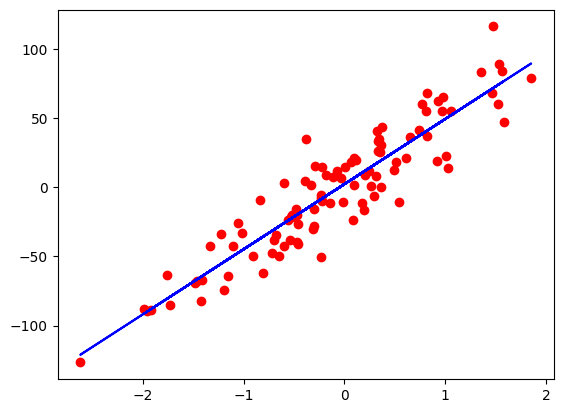

In [28]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


#Prepare the data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)


num_samples, num_features = X.shape
output_size = 1
learning_rate = 0.01
iterations = 1000

#model
model = nn.Linear(num_features, output_size)


#loss and optimizer
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(iterations):
    y_pred = model(X)
    l = loss(y_pred, y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f'epoch {epoch + 1}, loss {l:.4f}')

#Detach input from our computational graph and then convert the tensor again into numpy
predicted = model(X).detach().numpy()

plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()

In [44]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


#Prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

num_samples, num_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))

#Reshape the tensor using view (row,column)
Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)




class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred



#model
model = LogisticRegression(num_features)


#loss and optimizer
loss = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(iterations):

    #Forward pass
    y_pred = model(X_train)
    l = loss(y_pred, Y_train)

    #backward pass
    l.backward()

    #Update weights
    optimizer.step()

    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f'epoch {epoch + 1}, loss {l:.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f'accuracy: {acc:.4f}')

#Dataset and Data Loader Classes

In [5]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
      #Loading Data
      xy = np.loadtxt('/content/wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
      self.x = torch.from_numpy(xy[:,1:])
      self.y = torch.from_numpy(xy[:,[0]])
      self.n_samples = xy.shape[0]

  def __getitem__(self, index):
      return self.x[index], self.y[index]

  def __len__(self):
      return self.n_samples


dataset = WineDataset()
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)


dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = next(iter(dataloader))
data = dataiter
features, labels = data
print(features, labels)

tensor([[1.2450e+01, 3.0300e+00, 2.6400e+00, 2.7000e+01, 9.7000e+01, 1.9000e+00,
         5.8000e-01, 6.3000e-01, 1.1400e+00, 7.5000e+00, 6.7000e-01, 1.7300e+00,
         8.8000e+02],
        [1.1030e+01, 1.5100e+00, 2.2000e+00, 2.1500e+01, 8.5000e+01, 2.4600e+00,
         2.1700e+00, 5.2000e-01, 2.0100e+00, 1.9000e+00, 1.7100e+00, 2.8700e+00,
         4.0700e+02],
        [1.1820e+01, 1.7200e+00, 1.8800e+00, 1.9500e+01, 8.6000e+01, 2.5000e+00,
         1.6400e+00, 3.7000e-01, 1.4200e+00, 2.0600e+00, 9.4000e-01, 2.4400e+00,
         4.1500e+02],
        [1.3720e+01, 1.4300e+00, 2.5000e+00, 1.6700e+01, 1.0800e+02, 3.4000e+00,
         3.6700e+00, 1.9000e-01, 2.0400e+00, 6.8000e+00, 8.9000e-01, 2.8700e+00,
         1.2850e+03]]) tensor([[3.],
        [2.],
        [2.],
        [1.]])


In [38]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

178 45


In [39]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
      if (i+1) % 5 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [9]:
class WineDataset(Dataset):
  def __init__(self, transform):
      #Loading Data
      xy = np.loadtxt('/content/wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
      self.n_samples = xy.shape[0]
      self.x = xy[:,1:]
      self.y = xy[:,[0]]

      self.transform = transform

  def __getitem__(self, index):
      sample = self.x[index], self.y[index]
      if self.transform:
        sample = self.transform(sample)
      return sample

  def __len__(self):
      return self.n_samples


class ToTensor:
  def __call__(self, sample):
    inputs, labels = sample
    return torch.from_numpy(inputs), torch.from_numpy(labels)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, labels = sample
    inputs *= self.factor
    return inputs, labels

# dataset = WineDataset(transform=ToTensor())
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)

compose = torchvision.transforms.Compose([ToTensor(),MulTransform(2)])
dataset = WineDataset(transform=compose)
first_data = dataset[0]
features, labels = first_data
print(features, labels)


tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) tensor([1.])


In [13]:
import torch
from torch import nn, optim
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:',outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim=0)
print('softmax pytorch:',outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax pytorch: tensor([0.6590, 0.2424, 0.0986])


In [18]:
loss = nn.CrossEntropyLoss()

#Only the correct class label ( Total classes is 3 [0,1,2])
Y = torch.tensor([0])

# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2.0,1.0,0.1]])
Y_pred_bad = torch.tensor([[0.1,2.0,1.0]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)


# See the result for zeroth index cross entropy loss is less that means it is correct class
#because for correct class entropy loss decreses for incorrect it is incresing
print(l1.item())
print(l2.item())


_, y_pred_good = torch.max(Y_pred_good, 1)
_, y_pred_bad = torch.max(Y_pred_bad, 1)
print(y_pred_good)
print(y_pred_bad)

0.4170299470424652
2.3170299530029297
tensor([0])
tensor([1])


In [19]:
#Select all 3 clasess
Y = torch.tensor([2,0,1])

# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1,1.0,0.1],[0.1,1.0,2.1],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)


# See the result for zeroth index cross entropy loss is less that means it is correct class
#because for correct class entropy loss decreses for incorrect it is incresing
print(l1.item())
print(l2.item())


_, y_pred_good = torch.max(Y_pred_good, 1)
_, y_pred_bad = torch.max(Y_pred_bad, 1)
print(y_pred_good)
print(y_pred_bad)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [23]:
#Multiclass Problem

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out


model = NeuralNet(input_size=28*28, hidden_size=5, num_classes=10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [30]:
#Binary class Problem

class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)

    y_pred = torch.sigmoid(out)
    return out


model = NeuralNet2(input_size=28*28, hidden_size=5)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [34]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='/content/data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./content/data', train=False, transform=transforms.ToTensor(), download=True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [36]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


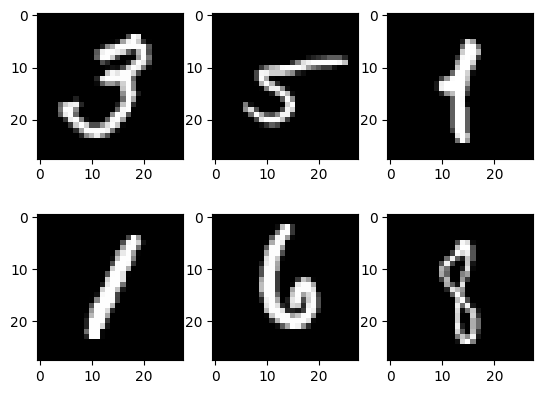

In [39]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [41]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size,num_classes):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')


600
